In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mice_pre = pd.read_csv("mouse_drug_data.csv")
df_clinic_pre = pd.read_csv("clinicaltrial_data.csv")


df_clinic= df_clinic_pre.drop_duplicates() 
df_mice = df_mice_pre.drop_duplicates()
# but there is a mouse recieveing more than one drug 
# because len(df_mice["Mouse ID"].unique()) <len(df_mice.index) == True
#mask1 = df_mice["Mouse ID"].duplicated() == True
#df_mice[mask1] revealed  	Mouse ID	Drug
                           #173	g989	Propriva

#mask = df_mice["Mouse ID"]=="g989"
#df_mice[mask] Revealed 	Mouse ID	Drug
                           # 7	g989	Stelasyn
                           # 173	g989	Propriva
# so we will drop these before we run the merge since you cannot give a subject more than on drug and have result integrity.
df_mice.drop([7,173],axis = 0, inplace = True)





# Combine the data into a single dataset going to merge with mice on left, else we get rows in new DF where the mice we removed 
# will show up 
df = df_mice.merge(df_clinic,how = "left",on = "Mouse ID")
df.info()






# so you can see we have 1880 non null columns .. which is less than the length of df_clinic, so successfully gotten rid of 
# data we did not want. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1879
Data columns (total 5 columns):
Mouse ID              1880 non-null object
Drug                  1880 non-null object
Timepoint             1880 non-null int64
Tumor Volume (mm3)    1880 non-null float64
Metastatic Sites      1880 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 88.1+ KB


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_g = df.groupby(["Drug", "Timepoint"])
df_g["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
df_2 = pd.DataFrame(df_g["Tumor Volume (mm3)"].mean()).reset_index()
# Preview DataFrame



df_2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_g["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
df_3 = pd.DataFrame(df_g["Tumor Volume (mm3)"].sem()).reset_index() 
# Preview DataFrame
df_3.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
df_2piv = df_2.pivot(index= "Timepoint",columns = "Drug",values = "Tumor Volume (mm3)")
df_3piv = df_3.pivot(index= "Timepoint",columns = "Drug",values = "Tumor Volume (mm3)")

# Preview that Reformatting worked

#df_2piv



df_3piv



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


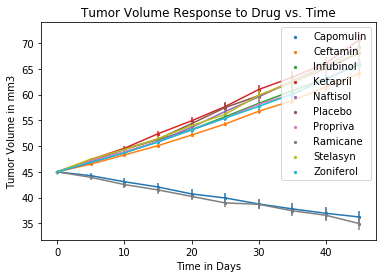

In [5]:
# did not have luck attempting to plot the above Df, so reindexed df_2 and did list comprehension to be able to loop thru the 
# different lists of data frames unique to each drug. Will follow this method for the remainder of the plots


df2_rindx = df_2.set_index("Drug")
plots = [df2_rindx.loc[x] for x in df2_rindx.index.unique()]
df_3rindx = df_3.set_index("Drug")
errs = [df_3rindx.loc[z] for z in df_3rindx.index.unique()]
   
fig,ax = plt.subplots()
for i in range(0,len(plots)):        
    y = plots[i]["Tumor Volume (mm3)"]
    x = plots[i].Timepoint
    z = errs[i]["Tumor Volume (mm3)"]
    ax.scatter(x,y,label = plots[i].index.unique().values[0], marker = "o",s = 5)
    ax.errorbar(x,y,z,label = None)
ax.set_xlabel("Time in Days") 
ax.set_ylabel("Tumor Volume in mm3") 
ax.set_title("Tumor Volume Response to Drug vs. Time")


ax.legend(loc=1)
fig.savefig("Tumor Volume vs.Time.png")


## Observations Capomulin and Ramicane are the only drugs showing a decrease in tumor volume over time.
# will be interesting to see if this is a common theme throughout.

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_g["Metastatic Sites"].mean()
# Convert to DataFrame
df4 = pd.DataFrame(df_g["Metastatic Sites"].mean()).reset_index()
# Preview DataFrame
df4.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_g["Metastatic Sites"].sem()
# Convert to DataFrame
df5 = pd.DataFrame(df_g["Metastatic Sites"].sem()).reset_index()
# Preview DataFrame
df5.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
df4_piv = df4.pivot(index= "Timepoint",columns = "Drug",values = "Metastatic Sites")
df5_piv = df5.pivot(index= "Timepoint",columns = "Drug",values = "Metastatic Sites")
# Preview that Reformatting worked
df4_piv.head()
df5_piv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378


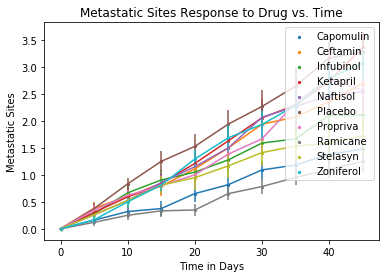

In [9]:
#### Reiterating from what  I did on previous plot, did not have luck attempting to plot the above Df, so reindexed df_2 and did list comprehension to be able to loop thru the 
# different lists of data frames unique to each drug. Will follow this method for the remainder of the plots

df4_rindx = df4.set_index("Drug")
plots2 = [df4_rindx.loc[x] for x in df4_rindx.index.unique()]
df5_rindx = df5.set_index("Drug")
errs2 = [df5_rindx.loc[z] for z in df5_rindx.index.unique()]
   
fig,ax = plt.subplots()
for i in range(0,len(plots2)):        
    y = plots2[i]["Metastatic Sites"]
    x = plots2[i].Timepoint
    z = errs2[i]["Metastatic Sites"]
    ax.scatter(x,y,label = plots2[i].index.unique().values[0], marker = "o",s = 5)
    ax.errorbar(x,y,z,label = None)
ax.set_xlabel("Time in Days") 
ax.set_ylabel("Metastatic Sites") 
ax.set_title("Metastatic Sites Response to Drug vs. Time")


ax.legend(loc=1)
fig.savefig("Metastatic Sites vs.Time.png")

## Observations while growing it's pretty easy to see tht Capomulin and Ramicane are much better at containing the growth in 
# metastatic sites over the time period. Let's see if they win on survival rates as well. 

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_g["Mouse ID"].count()
# Convert to DataFrame
df6 = pd.DataFrame(df_g["Mouse ID"].count()).reset_index()

# Preview DataFrame
df6.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
df6_piv = df6.pivot(index = "Timepoint",columns = "Drug",values = "Mouse ID")

# Preview the Data Frame
df6_piv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


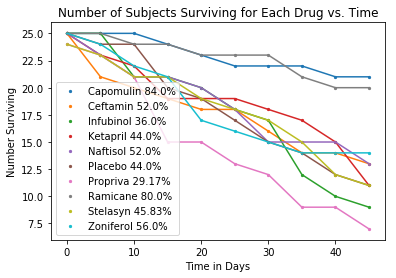

In [12]:
# Generate the Plot (Accounting for percentages)
df6_rindx = df6.set_index("Drug")
plots3 = [df6_rindx.loc[x] for x in df6_rindx.index.unique()]

fig,ax = plt.subplots()
for i in range(0,len(plots3)):        
    y = plots3[i]["Mouse ID"]
    x = plots3[i].Timepoint
    err = round(((plots3[i].iloc[i]["Mouse ID"]/plots3[i].iloc[0])*100),2).sem()
    ax.scatter(x,y,
        label =  plots3[i].index.unique().values[0]  +" "+ str(round(((plots3[i].iloc[9]["Mouse ID"]/plots3[i].iloc[0]["Mouse ID"])*100),2)) +"%"
               , marker = "o",s = 5)
    ax.errorbar(x,y,err,label = None)
ax.set_xlabel("Time in Days") 
ax.set_ylabel("Number Surviving") 
ax.set_title("Number of Subjects Surviving for Each Drug vs. Time")


ax.legend(loc=3)

fig.savefig("Survival Rates vs.Time.png")

## observations Probably the most significant indicator of effectiveness .. at least for the subject is survival rate..
## and again Campomulin and Ramicane outpaced the other drugs in that regard by a large margin. 

## Summary Bar Graph

In [146]:
# Calculate the percent changes for each drug
plots = [df2_rindx.loc[x] for x in df2_rindx.index.unique()]
Key = []
Value = []
for i in range(0,len(plots)):
    y = plots[i].index.unique().values[0]
    Key.append(y)
    if plots[i].iloc[9]["Tumor Volume (mm3)"] > plots[i].iloc[0]["Tumor Volume (mm3)"]:
           x = round(((plots[i].iloc[9]["Tumor Volume (mm3)"]/plots[i].iloc[0]["Tumor Volume (mm3)"])*100),2)
    else:
           x = 0 - (round(((plots[i].iloc[9]["Tumor Volume (mm3)"]/plots[i].iloc[0]["Tumor Volume (mm3)"])*100),2))
    Value.append(x)   
        
# Display the data to confirm
volume_change = {"Drug":Key,"Pct Tumor Volume Change":Value}


df_vol = pd.DataFrame.from_dict(volume_change)
df_vol.sort_values("Pct Tumor Volume Change",inplace = True)

In [147]:
df_vol

,Drug,Pct Tumor Volume Change
0,Capomulin,-80.52
7,Ramicane,-77.68
1,Ceftamin,142.52
2,Infubinol,146.12
9,Zoniferol,146.58
6,Propriva,147.24
5,Placebo,151.30
8,Stelasyn,152.09
4,Naftisol,153.92
3,Ketapril,157.03


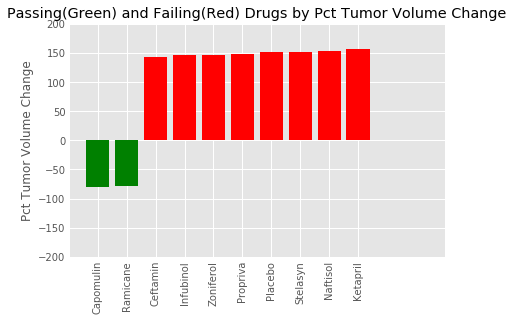

In [154]:




fig,ax = plt.subplots()
plt.style.use('ggplot')
plt.xlim(-1,12)
plt.ylim(-200,200)
y =  []

yDrug = []

x = np.arange(0,10,1)

for i in range(0,len(df_vol)):
    y.append(df_vol.iloc[i]["Pct Tumor Volume Change"])
    yDrug.append(df_vol.iloc[i].Drug)
    
      
        
        
df_vol["color"] = "Red" 
df_vol.loc[df_vol["Pct Tumor Volume Change"]<0,"color"] = "Green"
                            
               
                             
                            
ax.bar(x,y,color = df_vol["color"])

plt.xticks(x,yDrug,rotation = 90)

ax.set_title("Passing(Green) and Failing(Red) Drugs by Pct Tumor Volume Change")   
ax.set_ylabel("Pct Tumor Volume Change")


fig.savefig("Passing and Failing Drug by Tumor Volume Change Summary.png")


## Again here we see in a different way that the only two drugs that can be considered as "Passing"
## are Capomulin and Ramicane